# **IMPORT LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.layers import Input
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

C:\Users\alice\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


### **LOAD THE DATA**

In [2]:
# Load the Excel File
df = pd.read_excel("internalcapacity_my.xlsx")

In [3]:
# Printing the first five Rows
df.head()

Year  Forecast  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  \
0  2009-01       0.4         NaN         NaN         NaN         NaN   
1  2009-02       0.4         NaN         NaN         NaN         NaN   
2  2009-03       0.4         NaN         NaN         NaN         NaN   
3  2009-04       0.7         NaN         NaN         NaN         NaN   
4  2009-05       0.7         NaN         NaN         NaN         NaN   

   Unnamed: 6  Unnamed: 7  Unnamed: 8  
0         NaN         NaN         NaN  
1         NaN         NaN         NaN  
2         NaN         NaN         NaN  
3         NaN         NaN         NaN  
4         NaN         NaN         NaN

In [70]:
# Changing the Year column data type from object to Date Time
df['Year']= pd.to_datetime(df['Year'])


In [71]:
# Setting the Year Column as Index
df.set_index("Year", inplace = True)


In [72]:
# Shape of Dataset
df.shape

(156, 8)

In [73]:
# Plotting the forecast column
df1=df[['Forecast']]

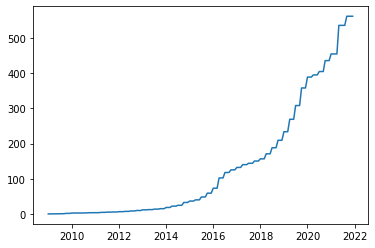

In [74]:
# Plotting the Forecast Column
plt.plot(df1)

In [75]:
# Scaline the Forecast Column values from 0 to 1
scaler=MinMaxScaler(feature_range=(0,1))
# Reshaping the Data
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [76]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.6)
# Test Size
test_size=len(df1)-training_size
# Train data and Test Data
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [77]:
# Size of Training Data and Test Data
training_size,test_size


(93, 63)

In [78]:
# convert an array of values into a dataset matrix
def traintestdataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]  
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [79]:
# Considering the previous 40 time steps
time_step = 40
# Creating an Training Data and Testing Data
X_train, y_train = traintestdataset(train_data, time_step)
X_test, ytest = traintestdataset(test_data, time_step)


In [80]:
# Training Size of Independent and Dependent Columns
print(X_train.shape), print(y_train.shape)


(52, 40)
(52,)


(None, None)

In [81]:
# Testing Size of Independent and Dependent Columns
print(X_test.shape), print(ytest.shape)

(22, 40)
(22,)


(None, None)

In [82]:
# Reshaping the Trainbing Dataset
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
# Reshaping the Testing Dataset
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [83]:
# Importing the Sequential Model
model=Sequential()
# Defining the input shape of LSTM Layer
model.add(LSTM(50,return_sequences=True,input_shape=(40,1)))
# Defining the Hidden Layer
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
# Defining the Output Layer
model.add(Dense(1))
# Compiling the Model using the Mean Squared Loss as the Loss Function and Adam Optimizer
model.compile(loss='mean_squared_error',optimizer='adam')

In [84]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 40, 50)            10400     
                                                                 
 lstm_7 (LSTM)               (None, 40, 50)            20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [85]:
# Training the Model with 100 epochs and batch size of 64 and Testing the model on test dataset and evaluating the Valdidation Loss
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
1/1 [==============================] - 7s 7s/step - loss: 0.0065 - val_loss: 0.5342
Epoch 2/100
1/1 [==============================] - 0s 141ms/step - loss: 0.0042 - val_loss: 0.4289
Epoch 3/100
1/1 [==============================] - 0s 122ms/step - loss: 0.0027 - val_loss: 0.3189
Epoch 4/100
1/1 [==============================] - 0s 115ms/step - loss: 0.0022 - val_loss: 0.2275
Epoch 5/100
1/1 [==============================] - 0s 117ms/step - loss: 0.0028 - val_loss: 0.2010
Epoch 6/100
1/1 [==============================] - 0s 124ms/step - loss: 0.0028 - val_loss: 0.2049
Epoch 7/100
1/1 [==============================] - 0s 134ms/step - loss: 0.0023 - val_loss: 0.2179
Epoch 8/100
1/1 [==============================] - 0s 123ms/step - loss: 0.0018 - val_loss: 0.2270
Epoch 9/100
1/1 [==============================] - 0s 113ms/step - loss: 0.0018 - val_loss: 0.2254
Epoch 10/100
1/1 [==============================] - 0s 118ms/step - loss: 0.0019 - val_loss: 0.2114
Epoch 11/100

In [86]:
# Train and Test Prediction
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [87]:
#Accuracy Score
r2_score(ytest, test_predict)

-86.14781232955997

In [88]:
# Calculating the Mean Sqaured Error for the Training Set
math.sqrt(mean_squared_error(y_train,train_predict))

0.007361083579488288

In [89]:
# Calculating the Mean Sqaured Error for the Test Set
math.sqrt(mean_squared_error(ytest,test_predict))


1.0505766907613725

In [90]:
mean_absolute_error(ytest,test_predict)

1.0372392308350251

In [91]:
mean_absolute_error(y_train,train_predict)

0.0049893140909175885

In [92]:
# Transforming the Data into the Orignal Form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

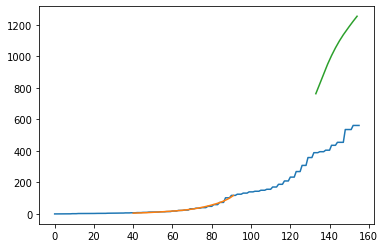

In [93]:
# look back to 40
look_back=40
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# Doing predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [94]:
len(test_data)

63

In [95]:
# Setting the Input Shape
x_input=test_data[23:].reshape(1,-1)
x_input.shape

(1, 40)

In [96]:
# Crating an List
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [97]:
temp_input

[0.33469896686854295,
 0.37246170288564306,
 0.37246170288564306,
 0.37246170288564306,
 0.4159244745279658,
 0.4159244745279658,
 0.4159244745279658,
 0.47880299251870323,
 0.47880299251870323,
 0.47880299251870323,
 0.5482721767011044,
 0.5482721767011044,
 0.5482721767011044,
 0.6371571072319203,
 0.6371571072319203,
 0.6371571072319203,
 0.6921980762379766,
 0.6921980762379766,
 0.6921980762379766,
 0.7032418952618454,
 0.7032418952618454,
 0.7032418952618454,
 0.7203420021375134,
 0.7203420021375134,
 0.7203420021375134,
 0.775561097256858,
 0.775561097256858,
 0.775561097256858,
 0.8092269326683292,
 0.8092269326683292,
 0.8092269326683292,
 0.8092269326683292,
 0.9538653366583542,
 0.9538653366583542,
 0.9538653366583542,
 0.9538653366583542,
 1.0,
 1.0,
 1.0,
 1.0]

In [98]:
# Doing Predictions for the Next 30 Months
from numpy import array

lst_output=[]
n_steps=40
i=0
while(i<30):
    
    if(len(temp_input)>40):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} Month input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} Month output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[2.2870038]
41
1 Month input [0.3724617  0.3724617  0.3724617  0.41592447 0.41592447 0.41592447
 0.47880299 0.47880299 0.47880299 0.54827218 0.54827218 0.54827218
 0.63715711 0.63715711 0.63715711 0.69219808 0.69219808 0.69219808
 0.7032419  0.7032419  0.7032419  0.720342   0.720342   0.720342
 0.7755611  0.7755611  0.7755611  0.80922693 0.80922693 0.80922693
 0.80922693 0.95386534 0.95386534 0.95386534 0.95386534 1.
 1.         1.         1.         2.28700376]
1 Month output [[2.3213372]]
2 Month input [0.3724617  0.3724617  0.41592447 0.41592447 0.41592447 0.47880299
 0.47880299 0.47880299 0.54827218 0.54827218 0.54827218 0.63715711
 0.63715711 0.63715711 0.69219808 0.69219808 0.69219808 0.7032419
 0.7032419  0.7032419  0.720342   0.720342   0.720342   0.7755611
 0.7755611  0.7755611  0.80922693 0.80922693 0.80922693 0.80922693
 0.95386534 0.95386534 0.95386534 0.95386534 1.         1.
 1.         1.         2.28700376 2.32133722]
2 Month output [[2.36327]]
3 Month input [0.3724617 

In [99]:
day_new=np.arange(1,41)
day_pred=np.arange(41,71)

In [100]:
import matplotlib.pyplot as plt

In [101]:
len(df1)

156

In [102]:
df1

array([[0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [5.34378340e-04],
       [5.34378340e-04],
       [5.34378340e-04],
       [1.06875668e-03],
       [1.06875668e-03],
       [1.06875668e-03],
       [2.67189170e-03],
       [2.67189170e-03],
       [2.67189170e-03],
       [4.45315283e-03],
       [4.45315283e-03],
       [4.45315283e-03],
       [4.63127895e-03],
       [4.63127895e-03],
       [4.63127895e-03],
       [5.16565729e-03],
       [5.16565729e-03],
       [5.16565729e-03],
       [6.05628785e-03],
       [6.05628785e-03],
       [6.05628785e-03],
       [6.41254008e-03],
       [6.41254008e-03],
       [6.41254008e-03],
       [7.83754898e-03],
       [7.83754898e-03],
       [7.83754898e-03],
       [9.08443178e-03],
       [9.08443178e-03],
       [9.08443178e-03],
       [9.79693623e-03],
       [9.79693623e-03],
       [9.79693623e-03],
       [1.14000713e-02],
       [1.14000713e-02],
       [1.14000713e-02],
       [1.28250802e-02],


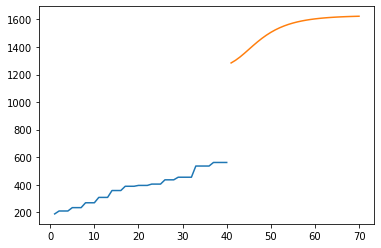

In [103]:
# Prediction Plot for the Next 30 Months, Orange Line show the prediction for the Next 30 Months
plt.plot(day_new,scaler.inverse_transform(df1[116:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

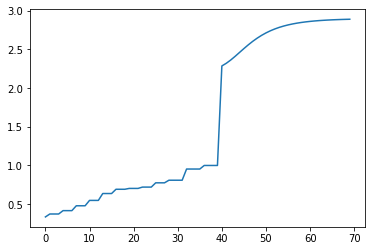

In [104]:
# Integrating the Orignal Line with the Orignal Line
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[116:])

In [105]:
# Overall Prediction Plot for the Next 30 months
df3=scaler.inverse_transform(df3).tolist()


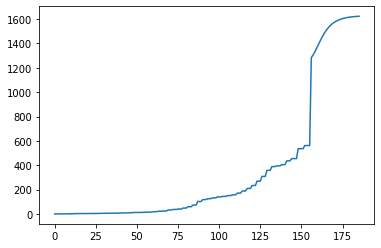

In [106]:
plt.plot(df3)
